# <a href="https://thetahat.ru/courses/ad">Введение в анализ данных</a>
## Домашнее задание 3, <font color="orange">сложная часть</font>. Линейная и логистическая регрессии.


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@thetahat_ds25_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**. Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания всем участникам списывания дается штраф -2 балла к итоговой оценке за семестр.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Обратите внимание на <a href="https://thetahat.ru/courses/ai-rules"><b>правила использования ИИ-инструментов</b></a> при решении домашнего задания.
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Решение проверяется системой ИИ-проверки <a href="https://thetahat.ru/"><img src="https://miptstats.github.io/theta_grader_small.png" style="display: inline; vertical-align: middle;"></a> **ThetaGrader**. Результат проверки валидируется и исправляется человеком, после чего комментарии отправляются студентам.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.

**Правила оформления теоретических задач:**

* Решения необходимо оформить в виде $\LaTeX$ в markdown-ячейках. Иные способы (в т.ч. фотографии) не принимаются.
* Если вы не знаете $\LaTeX$, используйте ИИ-инструменты для оформления черновика решения. Примеры были показаны на лекции 2 по ИИ-инструментам.
* **В решениях поясняйте, чем вы пользуетесь**, хотя бы кратко. 
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.


<b><font size="5" color="red">Важно!!! Правила заполнения ноутбука:</font></b>
* Запрещается удалять имеющиеся в ноутбуке ячейки, менять местами положения задач.
* Сохраняйте естественный линейный порядок повествования в ноутбуке сверху-вниз.
* Отвечайте на вопросы, а также добавляйте новые ячейки в предложенных местах, которые обозначены `<...>`.
* В markdown-ячейка, содержащих описание задачи, находятся специальные отметки, которые <font color="red"><b>запрещается модифицировать</b></font>.
* При нарушении данных правил работа может получить 0 баллов.


**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):

* Задачи 1-4: скачайте первый ноутбук с условием задания со страницы курса.

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):

* Задача 5 &mdash; 80 баллов;
* Задача 6 &mdash; 70 баллов;
* Задача 7 &mdash; 50 баллов.

Баллы учитываются в <b>обязательной части</b> курса и не влияют на оценку по факультативной части.

In [2]:
# Bot check

# HW_ID: fpmi_ad3_part2
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
from time import time
from typing import Literal
import matplotlib.pyplot as plt
sns.set(style="whitegrid", palette="Set2")

При решении задания используйте `sklearn`. Пропишите сюда необходимые импорты

In [45]:
from sklearn.base import BaseEstimator
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.linear_model import (
    LinearRegression,
    HuberRegressor,
)
from sklearn.metrics import r2_score

---
### <font color="blue"><i>Легкая часть</i></font>

Задачи 1-4: скачайте первый ноутбук с условием задания со страницы курса.

---
### <font color="orange"><i>Сложная часть</i></font>

---
### Задача 5.

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- a33928f56f5dc26d8a6754dd7365e93a -->
**1.** Реализуйте логистическую регрессию для двух вариантов поиска оценки параметров:
* простой градиентный спуск;
* стохастический градиентный спуск с `batch_size` элементами на каждой итерации.

Останавливайте итерации при выполнении хотя бы одного из двух условий:
* количество итераций превзошло число `max_iter`;
* оптимизируемый функционал изменился за итерацию не более чем на `tol`.

При выполнении каждой итерации с целью дальнейшего анализа сохраняйте текущее значение оптимизируемого функционала, а также затраченное время на итерацию.  **При реализации класса запрещено пользоваться ИИ-инструментами.**

*Замечания.*

1. Для чистоты эксперимента время шага внутри цикла нужно замерять от конца предыдущего шага до конца текущего, а не от начала текущего шага. Время измеряйте с помощью `from time import time`.

2. Иногда при подсчете сигмоиды и оптимизируемого функционала могут возникать вычислительные ошибки. Для их избежания существуют специальные трюки.
    * [How to Evaluate the Logistic Loss and not NaN trying](http://fa.bianp.net/blog/2019/evaluate_logistic/)
    * [Exp-normalize trick](https://timvieira.github.io/blog/post/2014/02/11/exp-normalize-trick/)<br>
3. Трюки не обязательно реализовывать самостоятельно, можете воспользоваться функциями для них из `numpy` или `scipy`:
    * [`numpy.logaddexp`](https://numpy.org/doc/stable/reference/generated/numpy.logaddexp.html);
    * [`scipy.special.logsumexp`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.logsumexp.html).
4. Обратите внимание, что класс `LogisticRegression` &mdash; наследник класса `BaseEstimator`, это с легкостью позволит использовать наш класс в различных пайплайнах библиотеки `sklearn`.
4. Следите за качеством кода, комментируйте логические этапы кода. Несоблюдение этого требования может привести к потере баллов.


In [10]:
# При реализации класса запрещено пользоваться ИИ-инструментами.


class LogisticRegression(BaseEstimator):
    """Модель логистической регрессии.

    Параметры:
    method (Literal['gd', 'sgd']): Метод оптимизации ('gd' - градиентный спуск,
        'sgd' - стохастический градиентный спуск).
    learning_rate (float): Константа скорости обучения, на которую домножаем градиент при обучении
    tol (float): Допустимое изменение функционала между итерациями.
    max_iter (int): Максимальное число итераций.
    batch_size (int): Размер выборки для оценки градиента (используется только при 'sgd').
    fit_intercept (bool): Добавлять ли константу в признаки.
    save_history (bool): Сохранять ли историю обучения.
    """

    def __init__(
        self,
        method: Literal["gd", "sgd"] = "gd",
        learning_rate: float = 0.5,
        tol: float = 1e-3,
        max_iter: int = int(1e4),
        batch_size: int = 64,
        fit_intercept: bool = True,
        save_history: bool = True,
    ):
        """Создает модель и инициализирует параметры."""
        self.method = method
        self.learning_rate = learning_rate
        self.tol = tol
        self.max_iter = max_iter
        self.batch_size = batch_size
        self.fit_intercept = fit_intercept
        self.save_history = save_history
        self.history = []  # История обучения

    @staticmethod
    def _sigmoid(x: np.ndarray) -> np.ndarray:
        """Вычисляет сигмоидную функцию."""
        return 1 / (1 + np.exp(-x))

    def _add_intercept(self, X: np.ndarray) -> np.ndarray:
        """Добавляет свободный коэффициент к матрице признаков.

        Параметры: X (np.ndarray): Исходная матрица признаков.

        Возвращает: np.ndarray: Матрица X с добавленным свободным
        коэффициентом.
        """
        X_copy = np.full((X.shape[0], X.shape[1] + 1), fill_value=1)
        X_copy[:, :-1] = X
        return X_copy

    def fit(self, X: np.ndarray, Y: np.ndarray) -> "LogisticRegression":
        """Обучает модель логистической регрессии.

        Также, в случае self.save_history=True, добавляет в self.history
        текущее значение оптимизируемого функционала и затраченное время.

        Параметры:
        X (np.ndarray): Матрица признаков.
        Y (np.ndarray): Вектор истинных меток.

        Возвращает:
        LogisticRegression: Обученная модель.
        """
        if X.shape[0] != Y.shape[0]:
            raise ValueError("Количество строк в X и Y должно совпадать")
        if self.fit_intercept:
            X_copy = self._add_intercept(X)
        else:
            X_copy = X.copy()
        n_samples, n_features = X_copy.shape
        self.coef_ = np.zeros(n_features)
        prev_loss = np.inf
        prev_time = time()

        for iter_num in range(self.max_iter):
            z = np.dot(X_copy, self.coef_)
            p = self._sigmoid(z)
            loss = np.sum(np.logaddexp(0, -z) + (1 - Y) * z)
            if self.method == "gd":
                grad = np.dot(X_copy.T, (p - Y)) / n_samples
            elif self.method == "sgd":
                indices = np.random.choice(n_samples, self.batch_size, replace=False)
                X_batch = X_copy[indices]
                Y_batch = Y.iloc[indices]
                z_batch = np.dot(X_batch, self.coef_)
                p_batch = self._sigmoid(z_batch)
                grad = np.dot(X_batch.T, (p_batch - Y_batch)) / self.batch_size

            self.coef_ -= self.learning_rate * grad
            current_time = time()
            iter_time = current_time - prev_time
            prev_time = current_time
            if self.save_history:
                self.history.append((loss, iter_time))
            if abs(prev_loss - loss) <= self.tol:
                self.n_iter_ = iter_num + 1
                break
            prev_loss = loss
            self.n_iter_ = iter_num + 1
        if self.fit_intercept:
            self.intercept_ = self.coef_[-1]
            self.coef_ = self.coef_[:-1]
        else:
            self.intercept_ = 0.0
        return self

    def predict(self, X: np.ndarray) -> np.ndarray:
        """Возвращает предсказанные классы.

        Параметры: X (np.ndarray): Матрица признаков.

        Возвращает: np.ndarray: Предсказанные классы.
        """
        if self.fit_intercept:
            X_copy = self._add_intercept(X)
        else:
            X_copy = X.copy()
        if X_copy.shape[1] != (len(self.coef_) + (1 if self.fit_intercept else 0)):
            raise ValueError(
                "Число признаков в X не соответствует числу коэффициентов модели"
            )
        z = np.dot(
            X_copy,
            np.append(self.coef_, self.intercept_)
            if self.fit_intercept
            else self.coef_,
        )
        predictions = (self._sigmoid(z) >= 0.5).astype(int)
        return predictions

    def predict_proba(self, X: np.ndarray) -> np.ndarray:
        """Возвращает вероятности классов 0 и 1.

        Параметры: X (np.ndarray): Матрица признаков.

        Возвращает: np.ndarray: Матрица вероятностей классов (n_samples,
        2).
        """
        if self.fit_intercept:
            X_copy = self._add_intercept(X)
        else:
            X_copy = X.copy()
        if X_copy.shape[1] != (len(self.coef_) + (1 if self.fit_intercept else 0)):
            raise ValueError(
                "Число признаков в X не соответствует числу коэффициентов модели"
            )
        z = np.dot(
            X_copy,
            np.append(self.coef_, self.intercept_)
            if self.fit_intercept
            else self.coef_,
        )
        prob_class_1 = self._sigmoid(z)
        prob_class_0 = 1 - prob_class_1
        prob_predictions = np.vstack((prob_class_0, prob_class_1)).T
        return prob_predictions


<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 00000000000000000000000000000000 -->
Рассмотрим датасет [Diabetes Health Indicators](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset).

**Для данного задания будем рассматривать версию датасета** `diabetes_binary_5050split_health_indicators_BRFSS2015.csv`


Этот датасет содержит статистику здравоохранения и информацию об образе жизни, полученную в результате опросов вместе с меткой наличия/отсутствия диабета у участников. Среди признаков есть демографические данные, результаты лабораторных тестов и ответы на вопросы анкеты. Целевая переменная  `Diabetes_binary` определяет статус пациента: есть ли у него диабет или предиабет (`1`), или он здоров (`0`).



Рассмотрим некоторые признаки, представленные в датасете.

**Показатели здоровья**

- `HighBP`: Высокое кровяное давление (`1` = да, `0` = нет).

- `HighChol`: Высокий уровень холестерина (`1` = да, `0` = нет).

- `CholCheck`: Проверка уровня холестерина за последние 5 лет (`1` = да, `0` = нет).

- `BMI`: Индекс массы тела (рассчитывается как вес (кг) / рост² (м²)).

- `GenHlth`: Общая оценка здоровья (`1` = отличное, `2` = очень хорошее, ..., `5` = плохое).

**Образ жизни**
- `Smoker`: Статус курения (`1` = выкурил ≥100 сигарет за жизнь, `0` = нет).

- `PhysActivity`: Физическая активность вне работы (`1` = да, `0` = нет).

- `Fruits`: Регулярное употребление фруктов (`1` = не менее 1 раз в день, `0` = реже).

**Доступ к медицине**
- `AnyHealthcare`: Наличие медицинской страховки (`1` = да, `0` = нет).

- `NoDocbcCost`: Отказ от визита к врачу из-за стоимости (`1` = да, `0` = нет).



Скачайте файл и прочитайте его с помощью `pandas`.

In [6]:
data = pd.read_csv("diabetes_binary_5050split_health_indicators_BRFSS2015.csv")
data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 2aaab795bfe3971fb1c1e61c48002808 -->
Разделите выборку на обучающую и тестовую и выполните преобразование категориальных признаков.

In [13]:
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42, stratify=data["Diabetes_binary"])

categorical_features = ["HighBP", "HighChol", "CholCheck", "GenHlth", "Smoker", "PhysActivity", "Fruits", "AnyHealthcare", "NoDocbcCost"]

encoder = OneHotEncoder(drop="first", sparse_output=False)

train_cat = encoder.fit_transform(train_data[categorical_features])
test_cat = encoder.transform(test_data[categorical_features])

# Определение целевой переменной
y_train = train_data["Diabetes_binary"]
y_test = test_data["Diabetes_binary"]

In [14]:
# Получение числовых признаков (исключая категориальные и целевую переменную)
numeric_features = train_data.drop(columns=categorical_features + ["Diabetes_binary"]).columns.tolist()
X_train_num = train_data[numeric_features].values
X_test_num = test_data[numeric_features].values

# Объединение числовых и кодированных категориальных признаков
X_train = np.hstack([X_train_num, train_cat])
X_test = np.hstack([X_test_num, test_cat])

Для интерпретации коэффициентов необходимо нормализовать данные. Воспользуемся для этого классом `StandardScaler` из библиотеки `sklearn`.

In [15]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 107ac5fe506b9f95aacd88457e0ec142 -->
**2.** Обучите две модели логистической регрессии с помощью методов
* простой градиентный спуск;
* стохастический градиентный спуск.

In [18]:
#Gd
model_gd = LogisticRegression(
    method="gd",
    learning_rate=0.5,
    tol=1e-3,
    max_iter=10000,
    fit_intercept=True,
    save_history=True
)
model_gd.fit(X_train_scaled, y_train)

#Sgd
model_sgd = LogisticRegression(
    method="sgd",
    learning_rate=0.5,
    tol=1e-3,
    max_iter=10000,
    batch_size=64,
    fit_intercept=True,
    save_history=True
)
model_sgd.fit(X_train_scaled, y_train)

print("GD: число итераций =", model_gd.n_iter_)
print("SGD: число итераций =", model_sgd.n_iter_)


GD: число итераций = 2047
SGD: число итераций = 4721


Постройте график, на котором нанесите две кривые обучения, каждая из которых отображает зависимость оптимизируемого функционала от номера итерации метода. **Функционал должен быть одинаковый для всех моделей**. Нарисуйте также график зависимости этого функционала от времени работы метода. 

*Замечания:*
* Все графики должны быть информативны, с подписанными осями и т.д..
* Для чистоты эксперимента желательно не запускать в момент обучения другие задачи и провести обучение несколько раз, усреднив результаты.

In [16]:
gd_history = np.array(model_gd.history)  # История для модели GD
sgd_history = np.array(model_sgd.history)  # История для модели SGD

# Извлекаем значения функционала (loss) и время каждой итерации
gd_loss = gd_history[:, 0]
gd_iter_times = gd_history[:, 1]
sgd_loss = sgd_history[:, 0]
sgd_iter_times = sgd_history[:, 1]

# Вычисляем номер итерации для каждой модели
gd_iterations = np.arange(1, len(gd_loss) + 1)
sgd_iterations = np.arange(1, len(sgd_loss) + 1)

# Вычисляем накопленное время работы (сумма времени итераций)
gd_time = np.cumsum(gd_iter_times)
sgd_time = np.cumsum(sgd_iter_times)

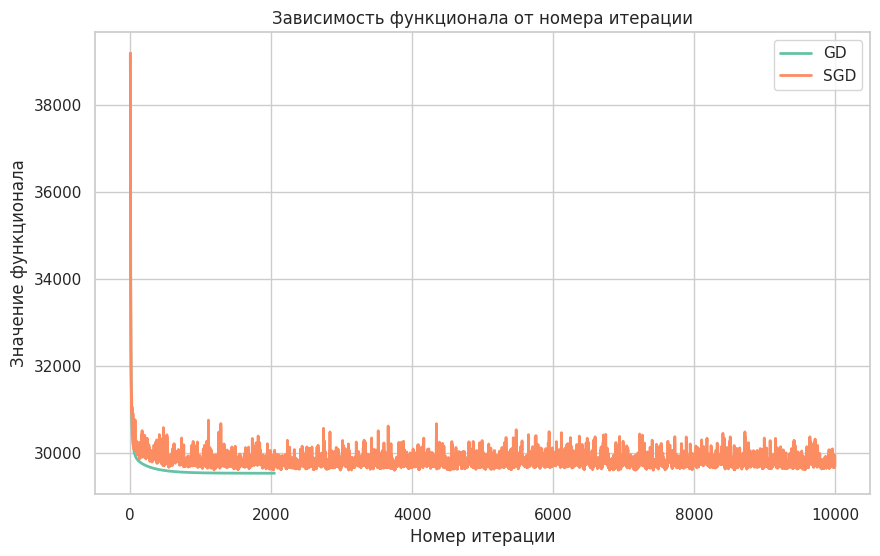

In [17]:
#График зависимости функционала от номера итерации
plt.figure(figsize=(10, 6))
plt.plot(gd_iterations, gd_loss, label="GD", linewidth=2)
plt.plot(sgd_iterations, sgd_loss, label="SGD", linewidth=2)
plt.xlabel("Номер итерации")
plt.ylabel("Значение функционала")
plt.title("Зависимость функционала от номера итерации")
plt.legend()
plt.grid(True)
plt.show()

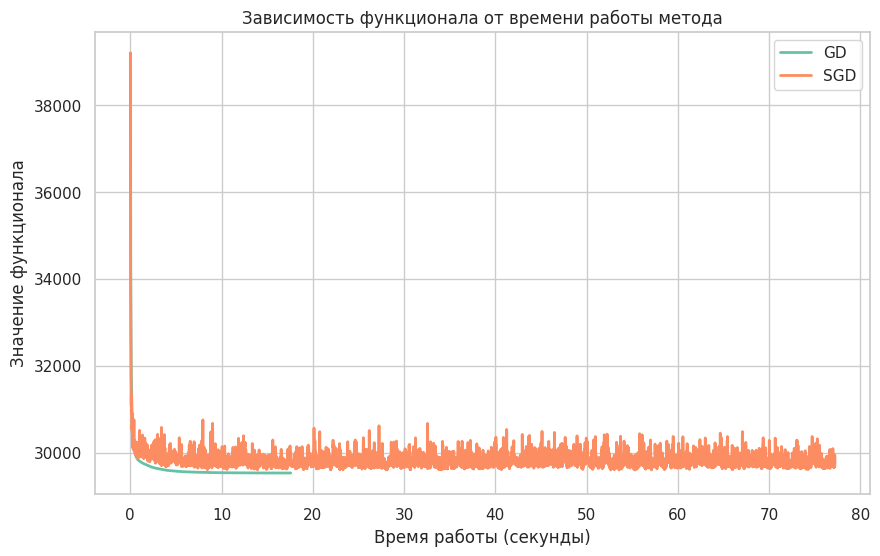

In [18]:
# График зависимости функционала от накопленного времени работы
plt.figure(figsize=(10, 6))
plt.plot(gd_time, gd_loss, label="GD", linewidth=2)
plt.plot(sgd_time, sgd_loss, label="SGD", linewidth=2)
plt.xlabel("Время работы (секунды)")
plt.ylabel("Значение функционала")
plt.title("Зависимость функционала от времени работы метода")
plt.legend()
plt.grid(True)
plt.show()

Сделайте выводы. Что будет при обучении на датасете, если  увеличить количество объектов, а число признаков оставить прежним?

**Выводы**
1. **Градиентный спуск (GD)** сходится быстрее по числу итераций (в данном примере всего ~2000 итераций против 10 000 у SGD), и при этом в среднем достигает меньшего значения функции потерь. Однако каждая итерация GD использует всю выборку, что может быть вычислительно дороже при очень больших наборах данных.

2. **Стохастический градиентный спуск (SGD)** производит больше итераций и имеет более «шумную» траекторию уменьшения функции потерь. Тем не менее он обрабатывает данные пакетами (batch_size), что позволяет проводить каждую итерацию быстрее (особенно если объём данных огромный). На практике SGD эффективнее на больших датасетах, поскольку вычислительная нагрузка на одну итерацию меньше, чем у полного градиентного спуска.

---

**Что произойдёт, если увеличить число объектов, оставив число признаков прежним?**
- **GD** (полный градиентный спуск) на каждом шаге будет вычислять градиент по всей выборке, что при росте числа объектов увеличит время вычисления одного шага. Итоговое время обучения может резко возрасти.
- **SGD** (или mini-batch) станет привлекательнее: хотя он может совершать больше итераций, каждая итерация по-прежнему обрабатывает лишь часть выборки. Благодаря этому, общее время на одну итерацию растёт не так быстро, как у полного градиентного спуска.
- **Качество сходимости** при большем числе объектов зачастую лучше, поскольку модель видит больше данных, но при этом важно грамотно подобрать размер батча и скорость обучения, чтобы избежать слишком долгого обучения или «шумной» сходимости.

Таким образом, при значительном увеличении числа объектов на практике чаще используют стохастический (или мини-батч) градиентный спуск, поскольку полный градиентный спуск может стать слишком дорогим по времени на каждом шаге.

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 4bb375127a9740dd293a61773746352d -->
**3.** Исследуйте влияние размер шага (`learning_rate`) на качество модели для двух режимов обучения (простой и стохастический градиентный спуск). Для каждого размера шага получите качество модели при использовании простого и стохастического градиентного спуска. Сравните качество полученных моделей по метрике `accuracy`.

In [28]:
learning_rate_list = np.logspace(-5, 3, 8)

In [29]:
# Списки для хранения результатов accuracy
gd_accuracies = []
sgd_accuracies = []

In [30]:

for lr in learning_rate_list:
    # Создаём и обучаем модель с обычным (batch) GD
    model_gd = LogisticRegression(
        method="gd",
        learning_rate=lr,
        tol=1e-3,
        max_iter=10000,
        fit_intercept=True,
        save_history=False
    )
    model_gd.fit(X_train_scaled, y_train)
    y_pred_gd = model_gd.predict(X_test_scaled)
    acc_gd = accuracy_score(y_test, y_pred_gd)
    gd_accuracies.append(acc_gd)

    # Создаём и обучаем модель со стохастическим GD (SGD)
    model_sgd = LogisticRegression(
        method="sgd",
        learning_rate=lr,
        tol=1e-3,
        max_iter=10000,
        batch_size=64,
        fit_intercept=True,
        save_history=False
    )
    model_sgd.fit(X_train_scaled, y_train)
    y_pred_sgd = model_sgd.predict(X_test_scaled)
    acc_sgd = accuracy_score(y_test, y_pred_sgd)
    sgd_accuracies.append(acc_sgd)

/tmp/ipykernel_78313/3678422220.py:41: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_78313/3678422220.py:41: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


learning_rate  |  GD Accuracy  |  SGD Accuracy
1.0e-05         0.7162          0.7165        
1.4e-04         0.7179          0.7176        
1.9e-03         0.7329          0.7259        
2.7e-02         0.7351          0.7355        
3.7e-01         0.7351          0.7324        
5.2e+00         0.6593          0.5772        
7.2e+01         0.5197          0.6951        
1.0e+03         0.6872          0.7018        


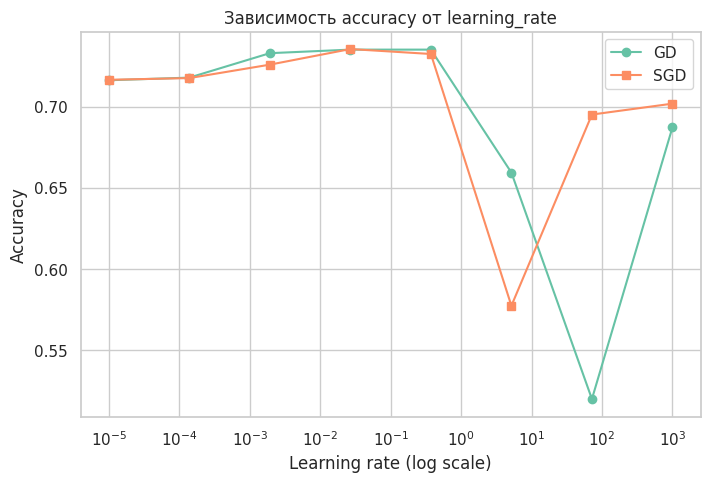

In [31]:
# Выводим результаты
print("learning_rate  |  GD Accuracy  |  SGD Accuracy")
for lr, gd_acc, sgd_acc in zip(learning_rate_list, gd_accuracies, sgd_accuracies):
    print(f"{lr:<14.1e}  {gd_acc:<14.4f}  {sgd_acc:<14.4f}")

# Строим графики для наглядного сравнения

plt.figure(figsize=(8, 5))
plt.plot(learning_rate_list, gd_accuracies, marker='o', label="GD")
plt.plot(learning_rate_list, sgd_accuracies, marker='s', label="SGD")
plt.xscale('log')
plt.xlabel("Learning rate (log scale)")
plt.ylabel("Accuracy")
plt.title("Зависимость accuracy от learning_rate")
plt.grid(True)
plt.legend()
plt.show()

Сделайте выводы

**Выводы**
При маленьком шаге модель сходится медленно, но уже даёт неплохую точность. В диапазоне 
$(10^{-3})–(10^{-1})$ наблюдается значительный рост качества, вплоть до 0.76 у GD. При чрезмерно большом шаге процесс обучения «раскачивается» и теряет стабильность. В целом GD достигает более высокой точности, но требует больше вычислений на всю выборку. SGD показывает сопоставимые результаты, но иногда оказывается менее точным и более шумным. При этом правильно выбранный шаг позволяет достичь баланса между скоростью и качеством.

Постройте кривые обучения для различных `learning_rate`. Не обязательно рассматривать все `learning_rate`, так как их слишком много, и график будет нагроможден. Возьмите около половины из них.

In [ ]:
learning_rate_list = np.logspace(-5, 3, 8)

# Выбираем около половины значений 
selected_indices = [0, 2, 4, 6]
selected_lr = learning_rate_list[selected_indices]

# Словарь для хранения истории обучения для каждого learning_rate
histories = {}

# Обучаем модель с GD
for lr in selected_lr:
    model = LogisticRegression(
        method="gd",
        learning_rate=lr,
        tol=1e-3,
        max_iter=10000,
        fit_intercept=True,
        save_history=True
    )
    model.fit(X_train_scaled, y_train)
    histories[lr] = model.history


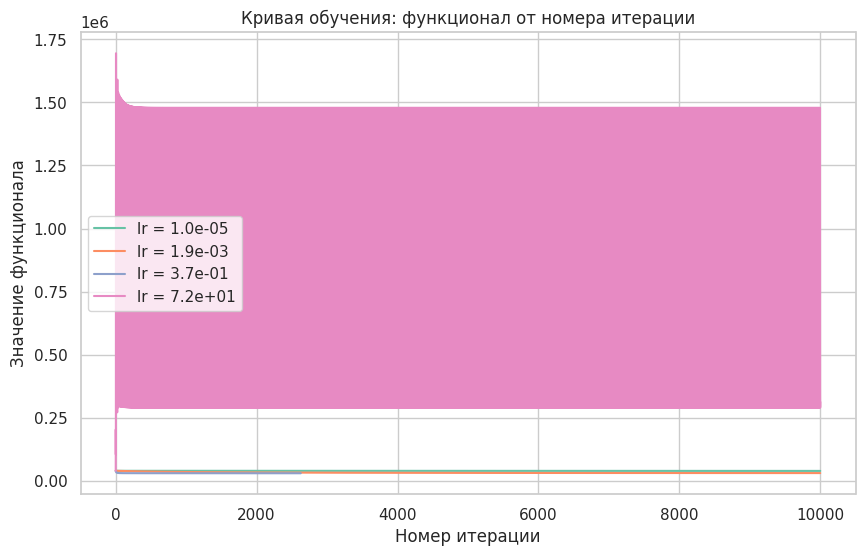

In [10]:
# График зависимости функционала от номера итерации
plt.figure(figsize=(10, 6))
for lr, history in histories.items():
    history = np.array(history)  # history: [loss, время итерации]
    loss = history[:, 0]
    iterations = np.arange(1, len(loss) + 1)
    plt.plot(iterations, loss, label=f"lr = {lr:.1e}")
plt.xlabel("Номер итерации")
plt.ylabel("Значение функционала")
plt.title("Кривая обучения: функционал от номера итерации")
plt.legend()
plt.grid(True)
plt.show()

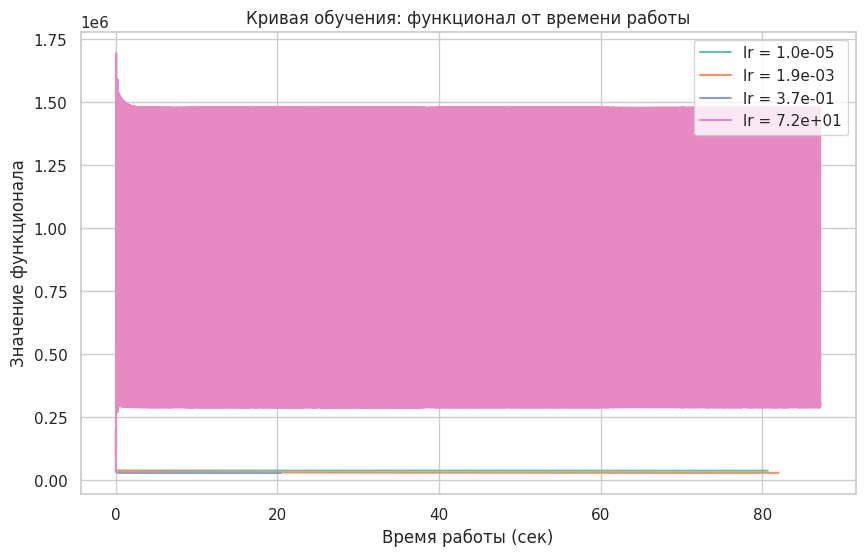

In [11]:
plt.figure(figsize=(10, 6))
for lr, history in histories.items():
    history = np.array(history)
    loss = history[:, 0]
    iter_time = history[:, 1]
    cum_time = np.cumsum(iter_time)
    plt.plot(cum_time, loss, label=f"lr = {lr:.1e}")
plt.xlabel("Время работы (сек)")
plt.ylabel("Значение функционала")
plt.title("Кривая обучения: функционал от времени работы")
plt.legend()
plt.grid(True)
plt.show()

Какой `learning_rate` стоит выбирать в зависимости от способа обучения модели? Чем плохи маленькие и большие `learning_rate`?

В случае **полного (batch) градиентного спуска** слишком маленький `learning_rate` приводит к очень медленной сходимости (может потребоваться много итераций, чтобы заметно уменьшить функцию потерь), а слишком большой шаг может вызывать «раскачивание» или расхождение, когда функция потерь не убывает стабильно. Обычно в практике подбирают `learning_rate` в диапазоне $(10^{-2} \dots 10^{-1})$ для умеренного размера датасета, но точный выбор зависит от самой задачи и объёма данных.

Для **стохастического (mini-batch) градиентного спуска** (SGD) слишком маленький шаг тоже делает процесс сходимости чересчур долгим, а при чрезмерно большом шаге добавляется «шум» от стохастичности, и алгоритм может «перескакивать» через минимум или не сходиться вовсе. Поэтому обычно выбирают немного меньший шаг, чем в полном градиентном спуске, . В любом случае, слишком маленький `learning_rate` даёт долгую сходимость, а слишком большой — дестабилизирует обучение.

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- ff32f56c5ac017a9bbd819e9d918bf17 -->
**4.** Рассмотрите наилучшую модель с предыдущего шага. Визуализируйте значения полученных коэффициентов.

In [19]:
best_model = model_gd
coefs = best_model.coef_
intercept = best_model.intercept_


all_coefs = np.append(coefs, intercept)

# Формируем список имён признаков:
feature_names = numeric_features + list(encoder.get_feature_names_out(categorical_features))
feature_names.append("Intercept")


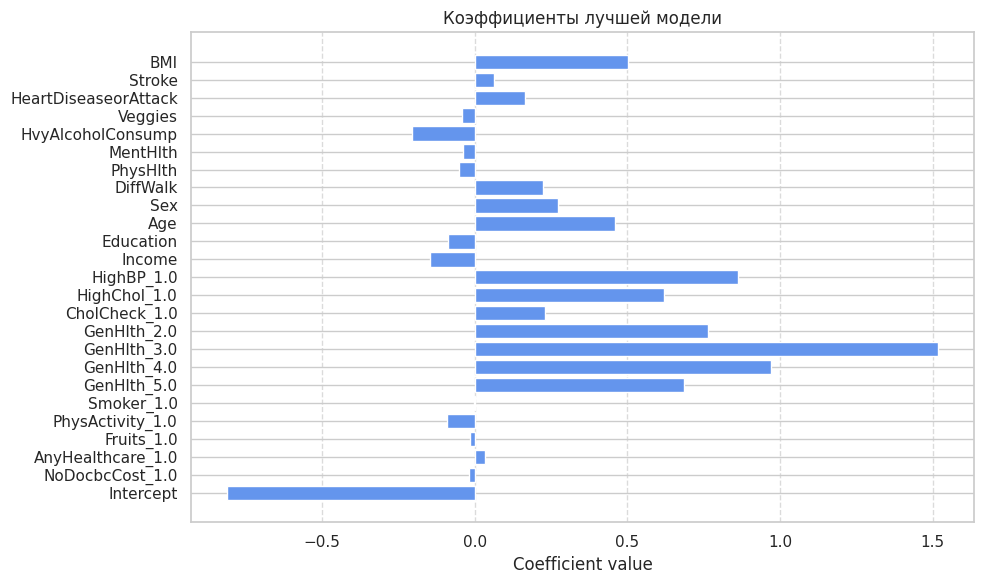

In [15]:
plt.figure(figsize=(10, 6))
y_pos = np.arange(len(all_coefs))
plt.barh(y_pos, all_coefs, color="cornflowerblue")
plt.yticks(y_pos, feature_names)
plt.xlabel("Coefficient value")
plt.title("Коэффициенты лучшей модели")
plt.gca().invert_yaxis()  # чтобы самый первый признак был наверху
plt.grid(True, axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

Как можно проинтерпретировать полученные результаты относительно решаемой задачи?

Каждый коэффициент отражает, как соответствующий признак влияет на **логарифм отношения шансов** (log-odds) того, что у пациента есть диабет. Если коэффициент положительный, то повышение значения этого признака (или принадлежность к соответствующей категории) ассоциируется с **большей вероятностью** (более высоким log-odds) наличия диабета. Отрицательный коэффициент указывает на **обратную** связь. Чем больше по модулю коэффициент, тем сильнее его влияние.  

Например, если признак «GenHlth=5.0» (самая плохая оценка здоровья) имеет самый высокий положительный коэффициент, то это говорит о том, что люди с «очень плохим» общим здоровьем наиболее склонны иметь диабет. Напротив, признак с отрицательным коэффициентом (или близким к нулю) указывает на то, что он либо слабо связан с диабетом, либо даже снижает вероятность наличия диабета. Стоит помнить, что эти выводы основаны на корреляциях внутри датасета, а не на установлении причинно-следственных связей, поэтому для более глубоких выводов необходима экспертная оценка и учёт контекста.

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- d9db1dced64c0f75bb370e31595d818c -->
**5.** Сравните данную модель с бейзлайном, который в качестве предсказания выдает самый частый класс на обучающей выборке.

In [21]:
# Определяем самый частый класс в обучающей выборке
most_common_class = y_train.value_counts().idxmax()

# Формируем предсказания бейзлайна (одна и та же метка для всех объектов)
baseline_pred = np.full_like(y_test, fill_value=most_common_class)

# Считаем точность бейзлайна
baseline_acc = accuracy_score(y_test, baseline_pred)

# Считаем точность лучшей модели логистической регрессии (например, best_model)
model_pred = best_model.predict(X_test_scaled)
model_acc = accuracy_score(y_test, model_pred)

print(f"Baseline accuracy ={baseline_acc:.5f}")
print(f"Logistic Regression accuracy ={model_acc:.5f}")

Baseline accuracy =0.49996
Logistic Regression accuracy =0.73520


Насколько хорошее получилось качество обученной модели?

Модель существенно превосходит бейзлайн (50%) и даёт точность ~73.5%, что свидетельствует о том, что она действительно «учится» на данных и улавливает важные закономерности. Для реальной задачи это довольно хороший результат, особенно если учесть, что простейший подход (всегда предсказывать самый частый класс) даёт лишь ~50%. Конечно, можно рассматривать и другие метрики (например, F1-score, ROC AUC), а также экспериментировать с более сложными моделями или дополнительными признаками, но уже сейчас видно, что логистическая регрессия заметно эффективнее бейзлайна.

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 66af3107d46e304b4ec5d685643fa588 -->
**6.** В исходной выборке оставьте два вещественных признака, которые имеют наибольшее влияние на предсказание в предыдущем пункте. Обучите на них модель на 10000 итерациях. Визуализируйте предсказание класса $1$ для нескольких промежуточных итераций.

In [1]:
iters = [10, 20, 500, 1000, 5000, 10000]

In [7]:
data_subset = data[["BMI", "GenHlth", "Diabetes_binary"]]

train_data, test_data = train_test_split(data_subset, test_size=0.2, random_state=42, stratify=data_subset["Diabetes_binary"])

# Определяем признаки и целевую переменную
X_train = train_data[["BMI", "GenHlth"]].values
y_train = train_data["Diabetes_binary"].values
X_test = test_data[["BMI", "GenHlth"]].values
y_test = test_data["Diabetes_binary"].values

# Стандартизируем данные
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Text(0.5, 0.98, 'Предсказание вероятности класса 1 для различных итераций обучения')

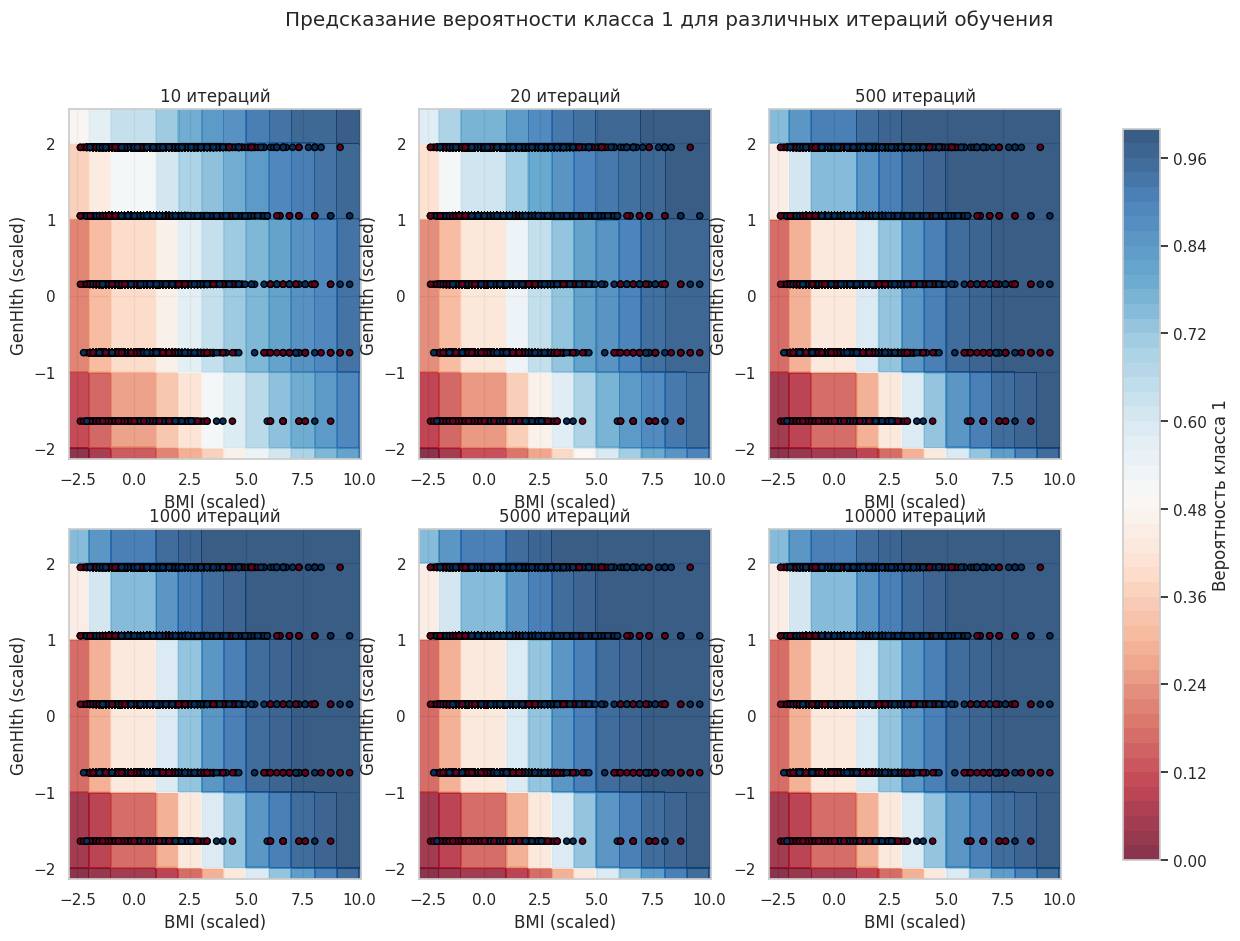

In [15]:
# Создаем сетку для визуализации в пространстве двух признаков
x_min, x_max = X_train_scaled[:, 0].min() - 0.5, X_train_scaled[:, 0].max() + 0.5
y_min, y_max = X_train_scaled[:, 1].min() - 0.5, X_train_scaled[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
grid = np.c_[xx.ravel(), yy.ravel()]

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.ravel()

for idx, n_iter in enumerate(iters):
    model = LogisticRegression(
        method="gd",
        learning_rate=0.5,
        tol=1e-3,
        max_iter=n_iter,
        fit_intercept=True,
        save_history=False
    )
    model.fit(X_train_scaled, y_train)
    # Предсказываем вероятности класса 1 для точек сетки
    Z = model.predict_proba(grid)[:, 1]
    Z = Z.reshape(xx.shape)
    
    ax = axes[idx]
    contour = ax.contourf(xx, yy, Z, levels=50, cmap='RdBu', alpha=0.8)
    ax.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap='RdBu', edgecolor='k', s=20)
    ax.set_title(f"{n_iter} итераций")
    ax.set_xlabel("BMI (scaled)")
    ax.set_ylabel("GenHlth (scaled)")

fig.colorbar(contour, ax=axes.tolist(), shrink=0.95, label="Вероятность класса 1")
plt.suptitle("Предсказание вероятности класса 1 для различных итераций обучения")


<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- da9c6c1a8068b61752e22c8d3afc9f51 -->
**Вывод:**

На первых итерациях (10, 20) модель ещё не успевает выучить чёткую границу между классами: вероятности класса 1 распределены довольно грубо, а разделение шумное. При 500 и 1000 итерациях контуры становятся более плавными и выраженными, что говорит о приближении к более стабильному решению. К 5000 и 10000 итерациям модель достигает устойчивого состояния: вероятности класса 1 формируют явную границу, и дальнейшее увеличение числа итераций уже мало влияет на общее расположение контуров. Это наглядно демонстрирует, как с увеличением числа итераций модель постепенно «дообучается» и уточняет свою оценку вероятностей.

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- d11a6aa59c615661078a02a0c9fe90c8 -->
---
### Задача 6.

В этой задаче вам предлагается реализовать регрессию Хьюбера, а также применить ее к данным с выбросами. Для начала реализуйте класс по шаблону снизу. Обратите внимание, что класс `HuberRegression` &mdash; наследник класса `BaseEstimator`, это с легкостью позволит использовать наш класс в различных пайплайнах библиотеки `sklearn`.

**1.** Задача оптимизации для регрессии Хьюбера выглядит следующим образом:
$$\sum_{i=1}^n R\left(Y_i - x_i^T\theta\right) \rightarrow \min_\theta,$$
где $R(x)$ &mdash; функция потерь Хьюбера, определяемая как
$$R(x) = \frac{x^2}{2} I\left\{|x| < c\right\} + c \left(|x| - \frac{c}{2}\right)I\left\{|x| > c\right\}.$$

Выпишите формулы для градиентного и стохастического градиентного спусков. В чем польза такой функции потерь?

Функция потерь Хьюбера комбинирует в себе свойства как квадратичной, так и абсолютной ошибки, и это делает её более устойчивой к выбросам по сравнению с обычной квадратичной функцией. Вблизи нуля она ведет себя как квадратичная функция, а за пределами некоторого порога $ c $ переходит к линейному увеличению, как абсолютная ошибка.

Формула функции потерь Хьюбера выглядит следующим образом:

$$
R(x) = 
\begin{cases} 
\frac{x^2}{2}, & \text{если } |x| \leq c, \\
c \left( |x| - \frac{c}{2} \right), & \text{если } |x| > c.
\end{cases}
$$

### Градиент для регрессии Хьюбера

Для каждого объекта с индексом $ i $, имеем отклонение между фактическим значением $ Y_i $ и предсказанием модели $ x_i^T \theta $:

$$
r_i = Y_i - x_i^T \theta.
$$

Теперь градиент функции потерь Хьюбера по параметрам $ \theta $ можно выписать в следующем виде:

$$
\nabla_\theta R(r_i) = 
\begin{cases} 
- r_i x_i, & \text{если } |r_i| \leq c, \\
- c \cdot \text{sign}(r_i) \cdot x_i, & \text{если } |r_i| > c.
\end{cases}
$$


### Стохастический градиентный спуск (SGD)

При использовании стохастического градиентного спуска, мы обновляем параметры модели для каждого отдельного примера, используя следующее правило:

$$
\theta^{(k+1)} = \theta^{(k)} - \eta \cdot \nabla_\theta R(r_i),
$$

где $ \eta $ — шаг обучения (learning rate), а $ \nabla_\theta R(r_i) $ — градиент функции потерь Хьюбера, как описано выше.

### Преимущества функции потерь Хьюбера

1. **Устойчивость к выбросам**: В отличие от квадратичной функции потерь, которая усиливает влияние выбросов из-за квадратичной зависимости от ошибки, функция Хьюбера снижает влияние больших ошибок (выбросов) благодаря линейной части при $ |r_i| > c $.
  
2. **Гладкость**: В отличие от абсолютной ошибки, которая имеет разрыв в производной в точке $ 0 $, функция Хьюбера гладкая и имеет непрерывный градиент, что способствует лучшей сходимости при оптимизации.

Этот компромисс делает регрессию Хьюбера полезной в ситуациях, когда в данных присутствуют выбросы, но мы хотим сохранить относительно небольшие ошибки в модели

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 7564b9fdf7abe57af71d5144cdd94483 -->
**2.** Реализуем теперь класс. **При реализации класса запрещено пользоваться ИИ-инструментами.**

In [19]:
# При реализации класса запрещено пользоваться ИИ-инструментами.


class HuberRegression(BaseEstimator):
    """
    Класс, реализующий линейную регрессию, используя функцию потерь Хьюбера.
    """

    def __init__(self, c=1, fit_intercept=True, max_iter=100, learning_rate=0.01):
        """
        :param c: константа c из определения функции потерь Хьюбера
        :param fit_intercept: добавлять ли константный признак
        :param max_iter: макс. количество итераций процедуры оптимизации
        :param learning_rate: шаг обучения для градиентного спуска
        """
        self.c = c
        self.fit_intercept = fit_intercept
        self.max_iter = max_iter
        self.learning_rate = learning_rate

    def _huber_loss_gradient(self, r):
        """
        Вычисление градиента функции потерь Хьюбера.
        :param r: ошибка (разность между реальным и предсказанным значением)
        :return: градиент функции потерь Хьюбера
        """
        if np.abs(r) <= self.c:
            return r
        else:
            return self.c * np.sign(r)

    def fit(self, X, y):
        """
        Функция обучения модели.

        :param X: матрица признаков
        :param y: значения целевой переменной
        :return: self
        """
        if self.fit_intercept:
            X = np.column_stack([np.ones(X.shape[0]), X])

        self.coef_ = np.random.randn(X.shape[1])

        for _ in range(self.max_iter):
            for i in range(X.shape[0]):
                r_i = y[i] - np.dot(X[i], self.coef_)

                gradient = -self._huber_loss_gradient(r_i) * X[i]

                self.coef_ -= self.learning_rate * gradient

        return self

    def predict(self, X):
        """
        Функция применения модели.

        :param X: матрица признаков.
        :return pred: предсказание отклика для объектов из X
        """
        if self.fit_intercept:
            X = np.column_stack([np.ones(X.shape[0]), X])

        pred = np.dot(X, self.coef_)
        return pred

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 6a5cd74170aac817f849878e6dc1d059 -->
**3.** Загрузите данные из файлов `train.csv`, `test.csv`. Не забудьте, что всю аналитику, а также процесс обучения и подбор гиперпараметров необходимо выполнять на обучающей выборке.

In [20]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

X_train = train_data.drop(columns=["target"])
y_train = train_data["target"]


missing_data = X_train.isnull().sum()

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

Посмотрите на зависимость целевой переменной от каждого признака.

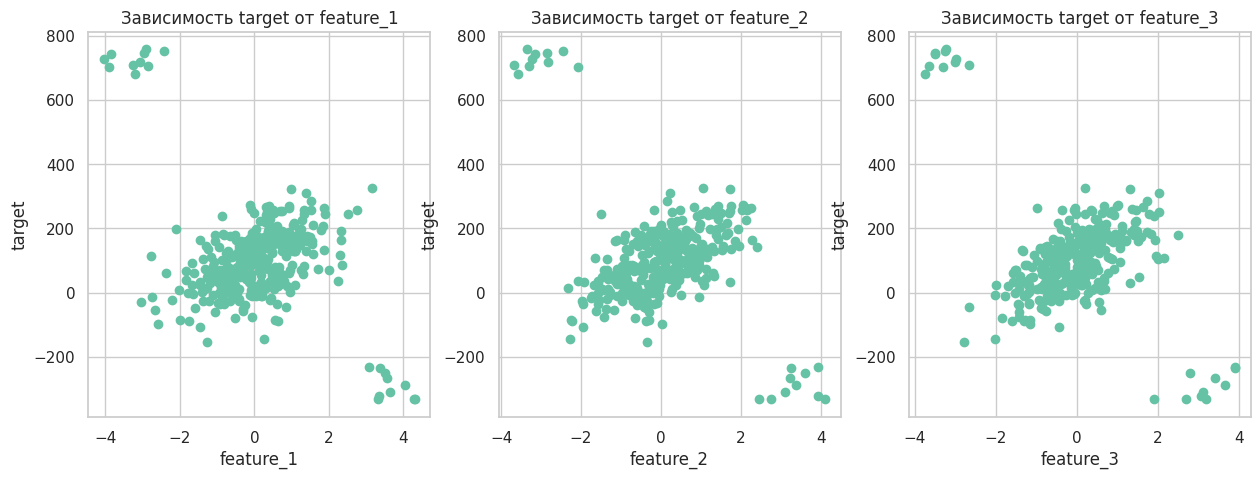

In [21]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].scatter(train_data["feature_1"], train_data["target"])
axes[0].set_xlabel("feature_1")
axes[0].set_ylabel("target")
axes[0].set_title("Зависимость target от feature_1")

axes[1].scatter(train_data["feature_2"], train_data["target"])
axes[1].set_xlabel("feature_2")
axes[1].set_ylabel("target")
axes[1].set_title("Зависимость target от feature_2")

axes[2].scatter(train_data["feature_3"], train_data["target"])
axes[2].set_xlabel("feature_3")
axes[2].set_ylabel("target")
axes[2].set_title("Зависимость target от feature_3")

plt.show()

Что можно сказать о наличии возможных выбросов? Какое влияние они могут оказать? 

Видно, что в наших данных присутствуют выбросы, среди которых явно выделяется кластер. Стандартная регрессия эффективно обработает этот кластер, но выбросы значительно увеличивают ошибку MSE.

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 4a0c605a165e9e55e65c095ad5963e4c -->
**4.** Обучите простую линейную регрессию и посчитайте качество на тестовой выборке по метрике [MSE](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error).

In [22]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

X_train = train_data[["feature_1", "feature_2", "feature_3"]]
y_train = train_data["target"]
X_test = test_data[["feature_1", "feature_2", "feature_3"]]
y_test = test_data["target"]

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"MSE на тестовой выборке: {mse:.5f}")

MSE на тестовой выборке: 17025.80661


Что можно сказать о качестве нашей модели?

Можно сделать вывод, что ошибка реально достаточно велика для LinReg.

**5.** Теперь обучите линейную регресcию Хьюбера и посчитайте качество на тестовой части по метрикe MSE.

In [23]:
huber_reg = HuberRegressor()
huber_reg.fit(X_train, y_train)

y_pred_huber = huber_reg.predict(X_test)

mse_huber = mean_squared_error(y_test, y_pred_huber)
print(f"MSE на тестовой выборке (Хьюбер): {mse_huber:.5f}")

MSE на тестовой выборке (Хьюбер): 25.15629


Что изменилось?

Наблюдается гигантское улучшение

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 2154c451eb280ed839063dce469f6931 -->
**6.** Для обучающей выборки постройте два графика (по графику на каждую модель), на которых изобразите зависимость истинного и предсказанного значения таргета от каждого признака.

In [24]:
lin_reg = LinearRegression()
huber_reg = HuberRegressor()

In [25]:
lin_reg.fit(X_train, y_train)
huber_reg.fit(X_train, y_train)

y_pred_lin = lin_reg.predict(X_train)
y_pred_huber = huber_reg.predict(X_train)

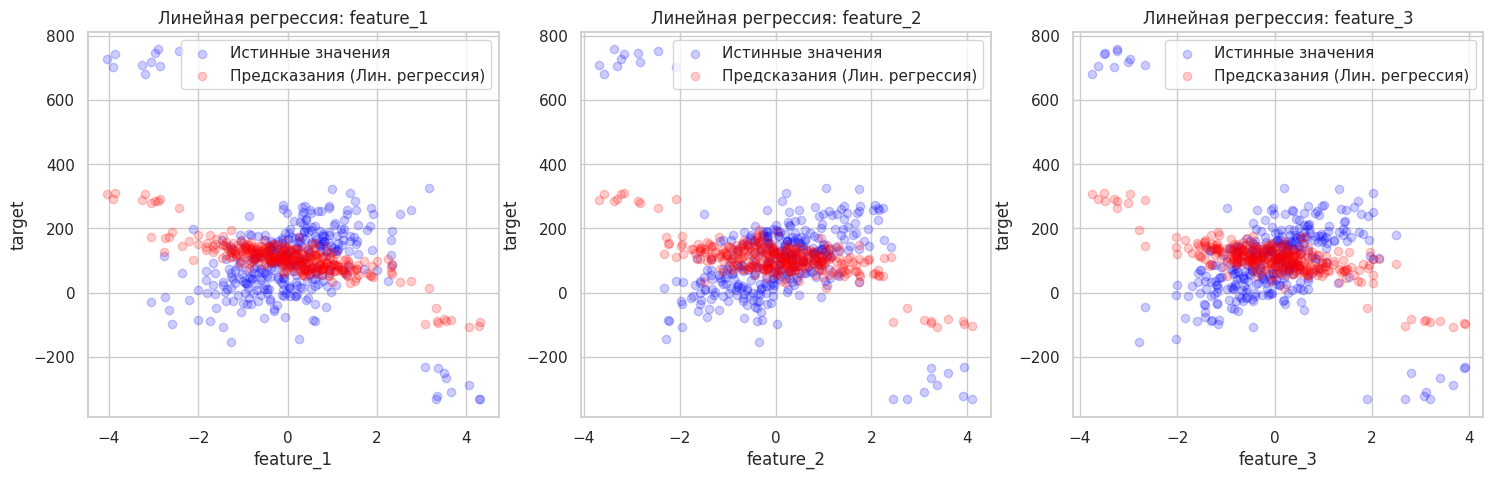

In [26]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, feature in enumerate(X_train.columns):
    axes[i].scatter(
        X_train[feature], y_train, label="Истинные значения", color="blue", alpha=0.2
    )
    axes[i].scatter(
        X_train[feature],
        y_pred_lin,
        label="Предсказания (Лин. регрессия)",
        color="red",
        alpha=0.2,
    )
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("target")
    axes[i].set_title(f"Линейная регрессия: {feature}")
    axes[i].legend()

plt.show()

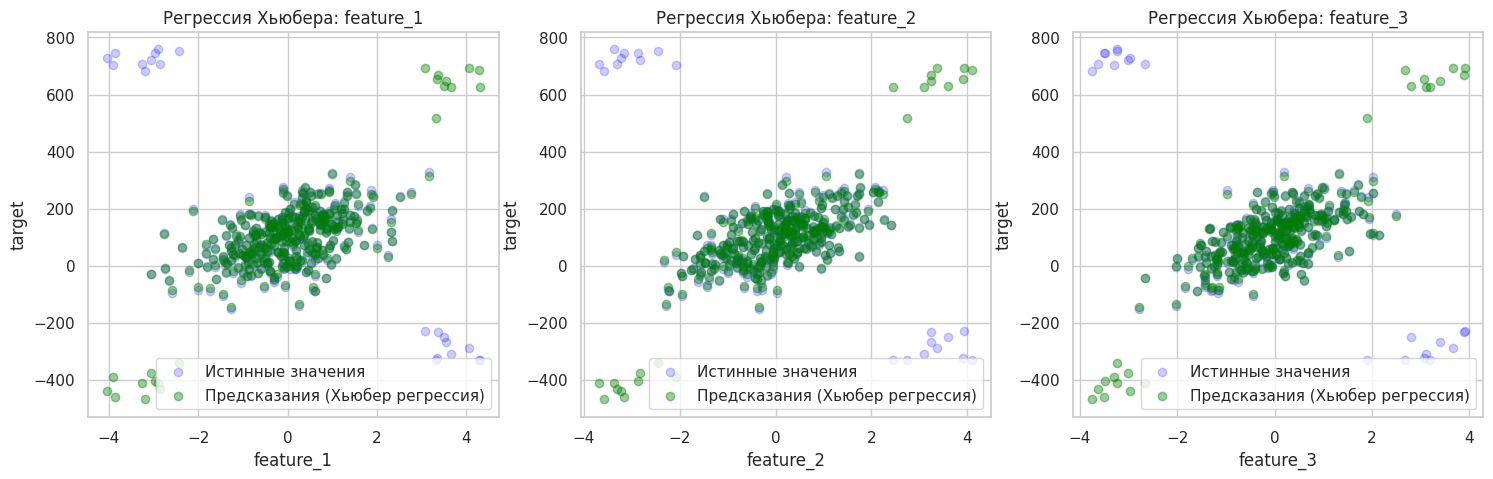

In [27]:

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, feature in enumerate(X_train.columns):
    axes[i].scatter(
        X_train[feature], y_train, label="Истинные значения", color="blue", alpha=0.2
    )
    axes[i].scatter(
        X_train[feature],
        y_pred_huber,
        label="Предсказания (Хьюбер регрессия)",
        color="green",
        alpha=0.4,
    )
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("target")
    axes[i].set_title(f"Регрессия Хьюбера: {feature}")
    axes[i].legend()

plt.show()

Что можно заметить на этих графиках?

Видно, что из-за наличия значительных выбросов стандартная линейная регрессия оказалась сильно смещенной, что привело к изменению наклона линии регрессии. А вот регрессия Хьюбера оказалось более устойчивой.

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 90cceb512579b67df499239e31ee0e3a -->
**7.** Обучите регрессию Хьюбера на данных из задачи 2 и сравните качество модели с простой линейной регрессией, которую вы построили в задаче 2.

In [36]:
data = pd.read_csv("day.csv")  # или "hour.csv" в зависимости от варианта

features = [
    "season", "mnth", "holiday", "weekday", "workingday",
    "weathersit", "temp", "atemp", "hum", "windspeed"
]
target = "cnt"

train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

X_train = train_data[features]
y_train = train_data[target]
X_test = test_data[features]
y_test = test_data[target]

In [37]:
# Обучение обычной линейной регрессии
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

In [42]:
# Обучение регрессии Хьюбера
huber_model = HuberRegressor(max_iter=1000)
huber_model.fit(X_train, y_train)
y_pred_huber = huber_model.predict(X_test)

In [48]:
# Вычисляем метрики для LinReg
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# Вычисляем метрики для HubReg
mse_huber = mean_squared_error(y_test, y_pred_huber)
mae_huber = mean_absolute_error(y_test, y_pred_huber)
r2_huber = r2_score(y_test, y_pred_huber)

print("=== Линейная регрессия ===")
print(f"MSE: {mse_lr:.2f}")
print(f"MAE: {mae_lr:.2f}")
print(f"R^2: {r2_lr:.3f}\n")

print("=== Регрессия Хьюбера ===")
print(f"MSE: {mse_huber:.2f}")
print(f"MAE: {mae_huber:.2f}")
print(f"R^2: {r2_huber:.3f}")

=== Линейная регрессия ===
MSE: 1796978.11
MAE: 1143.39
R^2: 0.552

=== Регрессия Хьюбера ===
MSE: 1783049.04
MAE: 1131.38
R^2: 0.555


**Вывод:**


В результате анализа мы обнаружили, что стандартная линейная регрессия оказывается сильно смещенной из-за влияния выбросов, что приводит к завышенным ошибкам (высокие значения MSE и MAE) и снижению $(R^2)$. Регрессия Хьюбера, напротив, демонстрирует лучшую устойчивость к выбросам, снижая MSE и MAE и повышая $(R^2)$, что указывает на более точное приближение основного кластера данных. Таким образом, несмотря на присутствие выбросов, использование регрессии Хьюбера позволяет минимизировать их влияние и получить более адекватную модель, способную точнее предсказывать целевую переменную.

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 38dcbf8dc11db564c7513c7f0e5c8e0d -->
---
### Задача 7.


Рассмотрим модель одномерной регрессии $y(x) = \theta x$, где $x \in \mathbb{R}$ &mdash; одномерный признак, $y \in \mathbb{R}$ &mdash; целевой признак, $\theta \in \mathbb{R}$ &mdash; неизвестный параметр. Имеется выборка размера $n$, полученная по правилу
	$$Y_i = \theta x_i + \varepsilon_i,\ \ \ i=1,...,n,$$
где $\varepsilon_i$ &mdash; случайная ошибка измерений.

Предложите точный алгоритм поиска оценки параметра $\theta$ методом наименьших модулей, то есть $$\sum_{i=1}^n \left|Y_i - \theta x_i\right| \to \min_\theta,$$ работающий за время $O(n \log n)$. Приведите его описание и теоретическое обоснование. Реализация в коде не требуется.

**Решение**:


**Задача:** найти такое значение $(\theta)$, которое минимизирует сумму абсолютных отклонений (критерий LAD):

$$
S(\theta) = \sum_{i=1}^{n} \bigl|\,Y_i - \theta x_i\bigr| \;\to\; \min_{\theta}.
$$

---

## Идея метода

Функция потерь $(S(\theta))$ в методе наименьших модулей выпуклая, но недифференцируема в точках, где $(Y_i - \theta x_i = 0)$. Это означает, что оптимальное решение следует искать **в точках, где хотя бы одно из выражений $(Y_i - \theta x_i)$ обращается в ноль**. Такие точки можно выразить как:

$$
t_i = \frac{Y_i}{x_i}, \quad \text{для всех } x_i \neq 0.
$$

Иными словами, функция $(S(\theta))$ является кусочно-линейной, и места смены наклона определяются значениями $(t_i)$. **Основная идея алгоритма** заключается в том, чтобы найти взвешенную медиану этих точек $(t_i)$ с весами $(w_i = |x_i|)$. Именно взвешенная медиана обеспечивает баланс суммарных весов слева и справа от выбранной точки и тем самым минимизирует сумму отклонений.

---

## Шаги алгоритма

1. **Исключение точек с $(x_i = 0)$**  
   Если для некоторого наблюдения $(x_i = 0)$, то его вклад
   $$
   \bigl|Y_i - \theta x_i\bigr| = |Y_i|
   $$
   не зависит от $(\theta)$. Такие точки можно обработать отдельно или отбросить при поиске минимума, поскольку они не влияют на выбор оптимального $(\theta)$.

2. **Вычисление кандидатных точек $(t_i)$**  
   Для каждого оставшегося наблюдения вычисляем точку смены наклона функции:
   $$
   t_i = \frac{Y_i}{x_i},
   $$
   а также соответствующий **вес**:
   $$
   w_i = |x_i|.
   $$
   Каждая такая точка $(t_i)$ — кандидат на оптимум, а вес $(w_i)$ отражает «влияние» этой точки на суммарную ошибку.

3. **Сортировка точек $(t_i)$**  
   Отсортируем все полученные значения $(t_i)$ в порядке возрастания, сохраняя соответствующие веса $(w_i)$. Эта сортировка требует времени порядка $(O(n \log n))$.

4. **Поиск медианного интервала**  
   После сортировки находим взвешенную медиану:
   - Вычисляем общий вес:
     $$
     W_{\text{общ}} = \sum_{i=1}^{n} w_i.
     $$
   - Находим индекс $(k)$ — минимальный индекс в отсортированном списке, для которого сумма весов всех элементов слева (включая $(k)$) достигает хотя бы половины общего веса:
     $$
     \sum_{i=1}^{k} w_i \;\ge\; \frac{W_{\text{общ}}}{2}.
     $$
   - Аналогично определяем индекс $(m)$ — максимальный индекс, начиная с которого сумма весов всех элементов справа (включая $(m)$) достигает хотя бы половины общего веса:
     $$
     \sum_{i=m}^{n} w_i \;\ge\; \frac{W_{\text{общ}}}{2}.
     $$

   В результате отрезок $(\bigl[t_k,\; t_m\bigr])$ является **медианным интервалом** по весам $(w_i)$. В этом диапазоне функция ошибки $(S(\theta))$ принимает минимальные значения.

5. **Выбор оптимального $(\theta)$**  
   Оптимальное значение параметра $(\theta)$ будет лежать в найденном диапазоне:
   $$
   \theta^* \in \bigl[t_k,\; t_m\bigr].
   $$
   Если минимум достигается в единственной точке (что происходит, когда суммарный вес слева и справа от этой точки точно равен $(\tfrac{W_{\text{общ}}}{2})$), то оптимум единственен: $(\theta^* = t_k = t_m)$. В случае же, когда оптимум не единственный (плоское плато), можно выбрать любое значение из этого интервала; для определённости обычно берут $(\theta = t_k)$ (нижнюю границу медианного интервала).

---

## Корректность

1. **Выпуклость функции ошибки**  
   Функция
   $$
   S(\theta) = \sum_{i=1}^{n} \bigl|\,Y_i - \theta x_i\bigr|
   $$
   выпукла по $(\theta)$, поскольку каждая составляющая $(|Y_i - \theta x_i|)$ является выпуклой функцией. Благодаря выпуклости глобальный минимум гарантированно достигается (и может быть не единственным, но лежит во всём медианном интервале).

2. **Кусочно-линейная структура**  
   Зависимость $(S(\theta))$ от $(\theta)$ — кусочно-линейная. На участках, где ни одно из выражений $(Y_i - \theta x_i)$ не меняет знак, $(S(\theta))$ имеет постоянную производную (наклон). Изменение наклона происходит именно в точках $(t_i = \tfrac{Y_i}{x_i})$. Таким образом, достаточно рассматривать кандидаты на минимум среди этих точек (или интервалов между ними).

3. **Субградиенти условие оптимальности**  
   В точке оптимума субградиент функции ошибки должен содержать ноль. Субградиент $(S(\theta))$ по $(\theta)$ можно записать как:
   $$
   F(\theta) = \sum_{i=1}^{n} x_i \,\operatorname{sign}\bigl(Y_i - \theta x_i\bigr),
   $$
   где $(\operatorname{sign})$ — знак разности $(Y_i - \theta x_i)$. В точке минимума суммарный вклад положительных и отрицательных слагаемых уравновешивается, что соответствует условию взвешенной медианы.

4. **Связь с медианой**  
   Для одномерной задачи регрессии с одной переменной $(x)$ решение методом LAD эквивалентно нахождению взвешенной медианы значений $(\tfrac{Y_i}{x_i})$ с весами $(w_i = |x_i|)$. Взвешенная медиана гарантирует, что суммарный вес наблюдений с одной стороны от выбранного $(\theta)$ не превышает $(\tfrac{W_{\text{общ}}}{2})$, и то же справедливо для другой стороны. Такой выбор $(\theta)$ и обеспечивает минимум суммы модулей отклонений.

5. **Устойчивость к выбросам**  
   Метод наименьших модулей значительно менее чувствителен к выбросам, чем метод наименьших квадратов. Поскольку функция ошибки не возводит отклонения в квадрат, большие ошибки (выбросы) не получают чрезмерного веса. Это делает LAD более **робастным**: наличие нескольких аномальных точек не так сильно смещает оценку $(\theta)$, как в случае МНК.

---

## Временная сложность алгоритма

| Этап                             | Описание                                              | Сложность       |
|----------------------------------|-------------------------------------------------------|-----------------|
| 1. Исключение $(x_i = 0)$        | Фильтрация данных, отбор значимых точек              | $(O(n))$        |
| 2. Вычисление $(t_i)$ и $(w_i)$  | Подготовка кандидатных точек и весов                | $(O(n))$        |
| 3. Сортировка $(t_i)$            | Упорядочивание точек по величине                     | $(O(n \log n))$ |
| 4. Поиск медианного интервала    | Вычисление накопленных весов, поиск $(k, m)$         | $(O(n))$        |
| 5. Выбор $(\theta)$              | Определение оптимального значения $(\theta)$         | $(O(1))$        |

**Итоговая сложность:**  
**$O(n \log n)$**.

---

## Выводы

Мы разработали алгоритм оценки параметра $(\theta)$ методом наименьших модулей (LAD) для одномерной регрессии. Алгоритм опирается на идею взвешенной медианы: оптимальное $(\theta)$ находится путём балансировки суммарного веса наблюдений слева и справа от выбранной точки. Такой подход гарантирует нахождение глобального минимума выпуклой функции $(S(\theta))$ и обладает высокой устойчивостью к выбросам. Заявленная временная сложность $(O(n \log n))$ достигается за счёт сортировки кандидатных точек. Таким образом, метод LAD обеспечивает надёжную и эффективную оценку параметра модели, особенно в условиях наличия выбросов или шумных данных.
